# 学習済Doc2Vecモデルによるお手軽文章属性推定

## 推論モデル作成

各種ファイルのパス

In [3]:
DOC2VEC = "../randd_eight_skill_prediction/models/jawiki.doc2vec.dbow300d.model"

NEOLOGD = "/usr/local/lib/mecab/dic/mecab-ipadic-neologd"

In [4]:
from LabelEstimator import LabelEstimator

In [5]:
model = LabelEstimator(DOC2VEC, NEOLOGD)

Loading Doc2Vec model...
Done!


任意でラベルを決める

In [6]:
model.set_labels(["野球", "サッカー", "バスケットボール", "テニス", "卓球"])

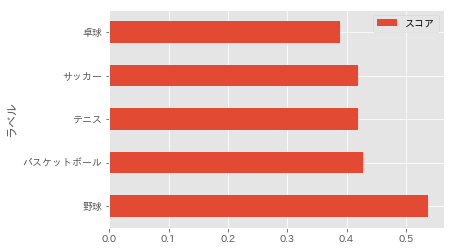

,スコア
ラベル,
野球,0.537374
バスケットボール,0.427758
テニス,0.418875
サッカー,0.418532
卓球,0.389130


In [7]:
model.estimate("イチローが現役選手を引退した。")

ラベルを設定していないと，単純な辞書全体からの類推を行う。計算に時間がかかる他，単純な単語に結果が引っ張られてしまう。

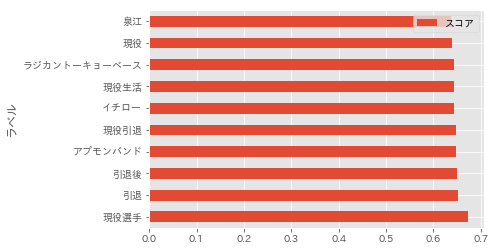

,スコア
ラベル,
現役選手,0.673436
引退,0.651344
引退後,0.651011
アプモンバンド,0.648664
現役引退,0.648380
イチロー,0.644330
現役生活,0.643301
ラジカントーキョーベース,0.642964
現役,0.639271


In [8]:
model.clear_labels()
model.estimate("イチローが現役選手を引退した。")

## Livedoorニュースコーパス：Sports Watch の記事の類推を行う


[ダウンロード](https://www.rondhuit.com/download.html#ldcc)

`ldcc-20140209.tar.gz` を解凍する。

テキストファイル置き場

```
./text
   |_sports-watch/
     |_sports-watch-???????.txt
     |_sports-watch-???????.txt
     |_sports-watch-???????.txt
     :
     :
```

自由にラベルを決める。決めた中から，推定をしてくれる。

In [9]:
model.set_labels(["野球", "サッカー", "バスケットボール", "テニス", "卓球"])

テキストファイルの読み込み

In [18]:
import re
from glob import glob
from tqdm import tqdm_notebook as tqdm

def clean_sportswatch_txt(s: str) -> str:
    s = s.replace("【Sports Watch】", "")
    # url除去
    s = re.sub(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#]+)", "" , s)
    s = re.sub(re.compile("[\d!-/:-@[-`{-~]"), '', s)
    return s

documents = []
for file in tqdm(glob("text/sports-watch/sports*.txt"),
                 desc="Loading .txt files"):
    with open(file, "r") as f:
        documents.append(clean_sportswatch_txt(f.read()))

`n`番目の記事に対しての推定結果を出力。


T
ザック・ジャパン好発進の裏側で、本田の“ヒデ化”が火種に
今月日、強豪アルゼンチン代表を下した、サッカー日本代表＝ザック・ジャパン。日には、完全アウェーの韓国戦でも、押し気味に試合を進め、スコアレスドローながらも、日本中のサッカーファンに期待を抱かせる上々の初陣となった。

だが、その裏には、ザック・ジャパンを揺るがす、新たな火種があるという。日（火）発売の「週刊アサヒ芸能」（号）の『NEWS SHOT！』のコーナーでは、『ザックジャパン「好発進」の裏に新火種 本田圭佑「ヒデ化」に大ブーイング！』なるレポートが掲載された。

同誌には、サッカージャーナリスト・後藤健生氏による、「ザッケローニ監督は南アＷ杯強の土台をもとにチームを作っている。トルシエもジーコもオシムもそうですが、過去の代表監督は独自色を押し出し、前任者からの継続性がなかった。やっと世界基準になった」というコメントが寄せれているものの、その一方では、対極の意見もあるようだ。

Ｗ杯・デンマーク戦のFK以降、日のテレク戦で今季リーグ戦点目を決めるまで、実に公式戦試合で無得点だった本田圭佑に対し、同じく同誌にコメントするスポーツ氏記者は、「最近の本田はほとんど報道陣にしゃべりません。南アの時は『大会に集中したい』という説明がありましたが、今回の代表戦ではテレビ局のインタビューに回答えただけで、それ以外は記者たちの前を素通りでしたよ。香川の台頭や移籍のことでナーバスになっているうえ、所属事務所の意向が影響していると言われますが、今の行動パターンはまるで以前の（中田）ヒデのようです」と語っている。

本田の“ヒデ化”は吉と出るか、凶と出るか——、心配の種は尽きない。

・週刊アサヒ芸能 ［ライト版］＜デジタル＞（PC版）
・週刊アサヒ芸能（モバイル版）



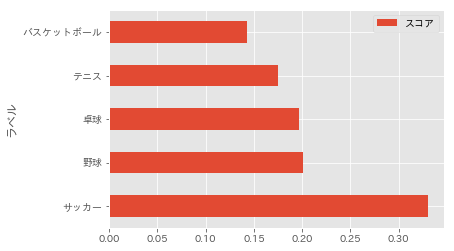

,スコア
ラベル,
サッカー,0.330383
野球,0.201033
卓球,0.196171
テニス,0.175083
バスケットボール,0.142734


In [22]:
n = 11
print(documents[n])
model.estimate(documents[n])